In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
img=cv2.imread('./test_images/cr7.jpg')
img.shape

(225, 225, 3)

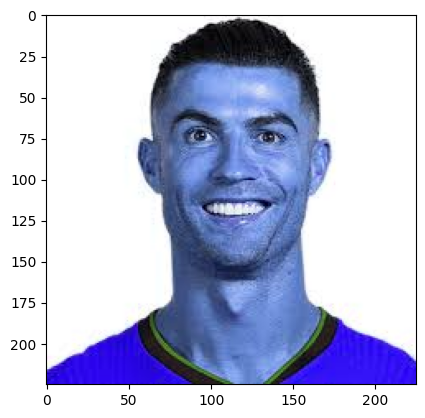

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(225, 225)

In [5]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 69,  59,  67, ...,  86,  84,  88],
       [ 62,  71,  80, ...,  85,  84,  92],
       [ 66,  71,  77, ...,  83,  92,  89]], shape=(225, 225), dtype=uint8)

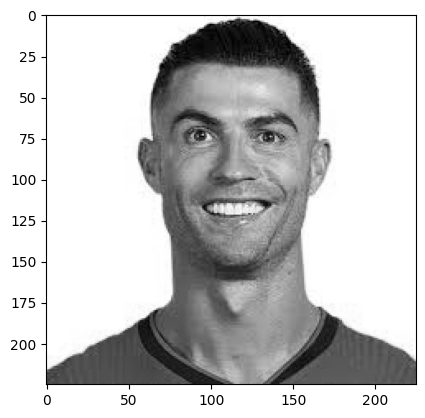

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 61,  29, 111, 111]], dtype=int32)

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(np.int32(61), np.int32(29), np.int32(111), np.int32(111))

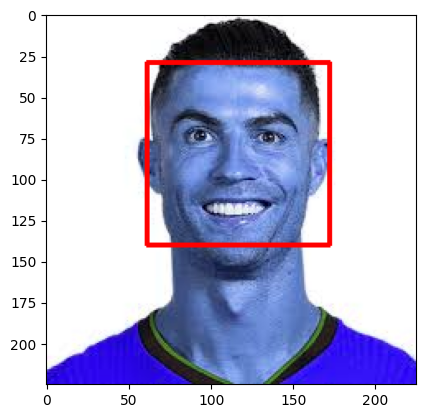

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

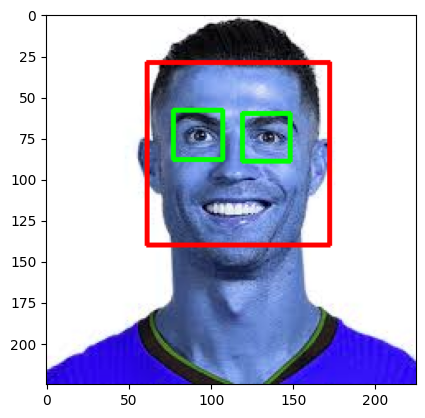

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

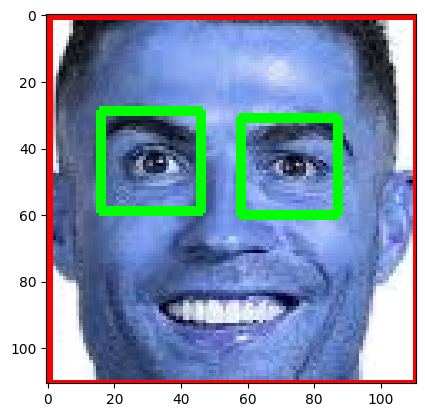

In [11]:
plt.imshow(roi_color)

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    if img is None:
        return None
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5) #image,scaleFactor,minNeighbours
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

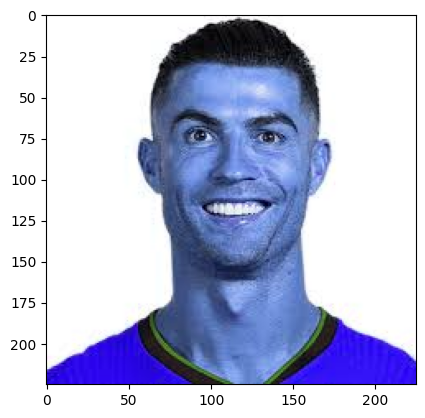

In [13]:
org_img=cv2.imread('./test_images/cr7.jpg')
plt.imshow(org_img)

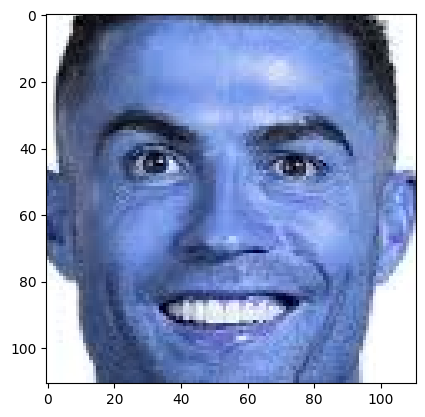

In [14]:
cropped_img=get_cropped_image_if_2_eyes('./test_images/cr7.jpg')
plt.imshow(cropped_img)

In [15]:
cropped_img2=get_cropped_image_if_2_eyes('./test_images/kaka.jpg')
cropped_img2

In [16]:
path_to_data="./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [17]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/cristiano_ronaldo',
 './dataset/cropped',
 './dataset/de_bryune',
 './dataset/lionel_messi',
 './dataset/mbappe',
 './dataset/neymar_jr']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
cropped_img_dirs=[]
player_file_names = {}

for img_dir in img_dirs:
    count = 1
    player_name=img_dir.split('/')[-1]
    player_file_names[player_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        
        # if roi_color is None:
        #     print("skipping..",entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+player_name
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name=player_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
        
            cv2.imwrite(cropped_file_path,roi_color)
            player_file_names[player_name].append(cropped_file_path)
            count+=1
     

Generating cropped images in folder:  ./dataset/cropped/cristiano_ronaldo
Generating cropped images in folder:  ./dataset/cropped/de_bryune
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/mbappe
Generating cropped images in folder:  ./dataset/cropped/neymar_jr


wavelet transformation allows to extract important features from an image

In [20]:
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray=img
    #datatype conversions
    #convert to grayscale
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray=np.float32(imArray)
    imArray/=255;
    #compute coefficients
    coeffs=pywt.wavedec2(imArray,mode,level=level)

    #process Coeffs
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    #resconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    return imArray_H
    

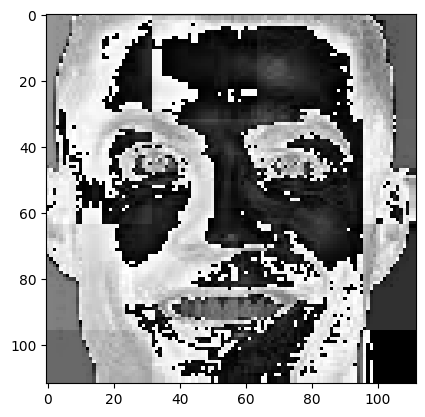

In [21]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [22]:
player_file_names

{'cristiano_ronaldo': ['./dataset/cropped/cristiano_ronaldo/cristiano_ronaldo1.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo2.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo3.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo4.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo5.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo6.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo7.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo8.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo9.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo10.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo11.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo12.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo13.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo14.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo15.png',
  './dataset/

In [41]:
class_dict={}
count=0
for player_name in player_file_names.keys():
    class_dict[player_name]=count
    count+=1
class_dict

{'cristiano_ronaldo': 0,
 'cropped': 1,
 'de_bryune': 2,
 'lionel_messi': 3,
 'mbappe': 4,
 'neymar_jr': 5}

In [42]:
X=[]
y=[]

for player_name,training_files in player_file_names.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scaled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scaled_raw.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[player_name])

In [43]:
len(X[0])

4096

In [44]:
32*32*3 + 32*32

4096

In [45]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(566, 4096)

Data cleaning is done. now we are ready to train our model.

In [46]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [47]:
X_train, x_test, Y_train, y_test = train_test_split(X,y, random_state=0)
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'rbf', C=10))])
pipe.fit(X_train,Y_train)
pipe.score(x_test,y_test)

0.6830985915492958

In [48]:
len(x_test)

142

In [49]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.53      0.81      0.64        31
           2       0.62      0.44      0.52        18
           3       0.76      0.81      0.78        47
           4       0.78      0.35      0.48        20
           5       0.83      0.73      0.78        26

    accuracy                           0.68       142
   macro avg       0.70      0.63      0.64       142
weighted avg       0.71      0.68      0.67       142



In [50]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [51]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [52]:
scores=[]
best_estimators={}
import pandas as pd
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(), mp['model'])
    clf=GridSearchCV(pipe, mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,Y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
df=pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

C:\Users\zero\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\zero\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\zero\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\zero\AppData\Local\Programs\Python\Pytho

,model,best_score,best_params
0,svm,0.759468,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.580252,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.752353,{'logisticregression__C': 10}


In [53]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.7464788732394366

In [54]:
best_estimators['svm'].score(x_test,y_test)

0.7605633802816901

In [55]:
best_clf=best_estimators['svm']

In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[28,  0,  2,  0,  1],
       [ 4, 11,  2,  1,  0],
       [ 7,  2, 36,  0,  2],
       [ 3,  1,  2, 12,  2],
       [ 2,  1,  1,  1, 21]])